# Box 3.1: Fecundity of predatory gastropods 
Ward & Quinn (1988) collected 37 egg capsules of the intertidal predatory gastropod Lepsiella vinosa from the littorinid zone on a rocky intertidal shore and 42 capsules from the mussel zone. Other data indicated that rates of energy consumption by L. vinosa were much greater in the mussel zone so there was interest in differences in fecundity between the zones. The $H_0$ was that there is no difference between the zones in the mean number of eggs per capsule. This is an indepen- dent comparison because individual egg capsules can only be in either of the two zones.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms

In [2]:
df = pd.read_csv('../../data/chpt3/ward.csv')

In [3]:
df.head()

,ZONE,EGGS
0,Mussel,11
1,Mussel,8
2,Mussel,18
3,Mussel,10
4,Mussel,9


## Descriptive Statistics

In [4]:
df.groupby('ZONE').describe(include='all')

EGGS                                                  
       count       mean       std  min   25%   50%   75%   max
ZONE                                                          
Littor  37.0   8.702703  2.025735  5.0   7.0   9.0  10.0  13.0
Mussel  42.0  11.357143  2.314550  8.0  10.0  11.0  13.0  18.0

### SEM

In [5]:
df.groupby('ZONE').sem()

,EGGS
ZONE,
Littor,0.333029
Mussel,0.357143


### 95% CI for mean

In [6]:
mussel = df[df.ZONE == 'Mussel']['EGGS']
littor = df[df.ZONE == 'Littor']['EGGS']

In [7]:
CI_Littorinid = stats.t.interval(alpha=0.95, df=len(littor)-1, loc=np.mean(littor, axis=0), scale=stats.sem(littor))
CI_Mussel = stats.t.interval(alpha=0.95, df=len(mussel)-1, loc=np.mean(mussel, axis=0), scale=stats.sem(mussel))
print(CI_Littorinid)
print(CI_Mussel)

(8.027288918576449, 9.378116486828958)
(10.635878227148966, 12.078407487136749)


### Parametric t-Test (independent variables)

In [8]:
stats.ttest_ind(mussel, littor)

Ttest_indResult(statistic=5.389852612477605, pvalue=7.457222363458506e-07)

### Mean difference

In [9]:
mean_0 = df.groupby('ZONE').mean()
d0 = abs(mean_0.loc['Littor'] - mean_0.loc['Mussel'])
print('Mean difference is: {}'.format(d0.values))

Mean difference is: [2.65444015]


###  95% CI for the difference between means

A confidence interval on the difference between means is computed using the following formula:
$$Low = M_1 - M_2 - (t_{CI})(S_{M_1-M_2})$$
$$High = M_1 - M_2 + (t_{CI})(S_{M_1-M_2})$$

With:  

- $M_1, M_2$ the respective means
- $t_{CI}$ the t for the desired level of confidence
- $S_{M_1-M_2}=\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}$ the estimated standard error of the difference


In [10]:
m1 = np.mean(mussel)
m2 = np.mean(littor)
sig_1 = np.std(mussel)
sig_2 = np.std(littor)
t_CL = stats.t.ppf(q = 0.975, df=len(mussel) + len(littor) -2)
S_m1_m2 = np.sqrt(sig_1**2/len(mussel)+sig_2**2/len(littor))
low = m1-m2-t_CL*S_m1_m2
high = m1-m2+t_CL*S_m1_m2
print('95% CI for difference of mean is: [{} {}]'.format(low, high))

95% CI for difference of mean is: [1.6944473902980148 3.6144329185822937]


**Calculation via StatsModels "CompareMeans" function**

http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.CompareMeans.html

In [11]:
cm = sms.CompareMeans(sms.DescrStatsW(mussel), sms.DescrStatsW(littor))
print(cm.tconfint_diff())

(1.6737703654627645, 3.635109943417544)


### Randomization  Test

Calculate mean difference of the two classes "Mussel" and "Littor":

Randomly allocate the 79 samples to two pseudo classes "A" and "B" with equal proportaions like the Mussel and Littors. Then calculate the difference in the mean of the two classes and save the result. 

In [12]:
a = 10000
d = []
tmp = df.EGGS.copy()
tmp = tmp.values
for i in range(a):
    np.random.shuffle(tmp) # randomly shuffle values
    A = np.mean(tmp[0:37]) # allocate 37 samples to class A
    B = np.mean(tmp[37:]) # allocate 42 samples to calass B
    d.append(A-B)

Test the proportion of all differences in means which are greater than the initial difference. This is the p-value for this randomization test. The probability of obtaining a similar or greater difference of means by chance.

In [13]:
(d0.values < d).sum()/a

0.0

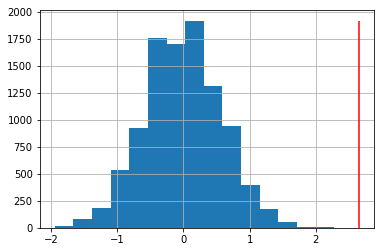

In [14]:
n, bins, patches = plt.hist(d, bins=15)
plt.vlines(x=d0.values, ymin=0, ymax=max(n), color='r')
plt.grid()

In [15]:
low = np.percentile(a = d, q=2.5, axis=0)
high = np.percentile(a = d, q=97.5, axis=0)
print('95% conf-interval Mean: [{} - {}]'.format(low,high))

95% conf-interval Mean: [-1.1293436293436283 - 1.1074646074646086]


### Mann–Whitney–Wilcoxon

In [16]:
stats.mannwhitneyu(mussel, littor)

MannwhitneyuResult(statistic=304.0, pvalue=1.4055660765830182e-06)